# NFL Exploratory Data Analysis: Basic Statistics

## Dataset Summary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import re
%matplotlib inline

In [2]:
df = pd.read_csv('data/raw/basic_stats.csv',parse_dates=['Birthday'])

In [3]:
df.head()

,Age,Birth Place,Birthday,College,Current Status,Current Team,Experience,Height (inches),High School,High School Location,Name,Number,Player Id,Position,Weight (lbs),Years Played
0,NaN,"Grand Rapids , MI",1921-05-23,Notre Dame,Retired,NaN,3 Seasons,71.0,NaN,NaN,"Evans, Fred",NaN,fredevans/2513736,NaN,185.0,1946 - 1948
1,NaN,"Dayton , OH",1930-12-21,Dayton,Retired,NaN,1 Season,70.0,NaN,NaN,"Raiff, Jim",NaN,jimraiff/2523700,NaN,235.0,1954 - 1954
2,56.0,"Temple , TX",1960-09-11,Louisiana Tech,Retired,NaN,1 Season,74.0,NaN,NaN,"Fowler, Bobby",NaN,bobbyfowler/2514295,NaN,230.0,1985 - 1985
3,30.0,"New Orleans , LA",1986-09-30,LSU,Retired,NaN,5 Seasons,73.0,NaN,NaN,"Johnson, Quinn",NaN,quinnjohnson/79593,NaN,255.0,2009 - 2013
4,25.0,"Detroit , MI",1992-03-31,Central Michigan,Active,Pittsburgh Steelers,3rd season,77.0,Clintondale HS,"Clinton Twp.,Macomb Co., MI","Walton, L.T.",96.0,l.t.walton/2552444,DE,305.0,NaN


## Cleaning Goals
* position to category
* column names to database table style
* current team to category
* position to category
* name split to first and last name
* player_id split to name and id parts
* years played to time delta
* birthday to datetime
* calculate missing ages where applicable
* status to category
* convert experience to numeric

In [4]:
def norm_cols(cols):
    '''
    converts column naming to traditional database-stle naming convention
    '''
    
    cols = cols.str.replace(' ','_').str.replace('(','').str.replace(')','').str.lower()
    return cols

In [5]:
# apply column renaming to dataframe
df.columns = norm_cols(df.columns)
df.columns

Index(['age', 'birth_place', 'birthday', 'college', 'current_status',
       'current_team', 'experience', 'height_inches', 'high_school',
       'high_school_location', 'name', 'number', 'player_id', 'position',
       'weight_lbs', 'years_played'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17172 entries, 0 to 17171
Data columns (total 16 columns):
age                     13504 non-null float64
birth_place             14794 non-null object
birthday                16835 non-null datetime64[ns]
college                 17133 non-null object
current_status          17172 non-null object
current_team            3096 non-null object
experience              17133 non-null object
height_inches           17026 non-null float64
high_school             2514 non-null object
high_school_location    2510 non-null object
name                    17172 non-null object
number                  1708 non-null float64
player_id               17172 non-null object
position                3096 non-null object
weight_lbs              17121 non-null float64
years_played            14076 non-null object
dtypes: datetime64[ns](1), float64(4), object(11)
memory usage: 2.1+ MB


In [7]:
# split player_id into numeric and name
df['name_id'],df['id'] = df['player_id'].str.split('/',1).str
df.head()

,age,birth_place,birthday,college,current_status,current_team,experience,height_inches,high_school,high_school_location,name,number,player_id,position,weight_lbs,years_played,name_id,id
0,NaN,"Grand Rapids , MI",1921-05-23,Notre Dame,Retired,NaN,3 Seasons,71.0,NaN,NaN,"Evans, Fred",NaN,fredevans/2513736,NaN,185.0,1946 - 1948,fredevans,2513736
1,NaN,"Dayton , OH",1930-12-21,Dayton,Retired,NaN,1 Season,70.0,NaN,NaN,"Raiff, Jim",NaN,jimraiff/2523700,NaN,235.0,1954 - 1954,jimraiff,2523700
2,56.0,"Temple , TX",1960-09-11,Louisiana Tech,Retired,NaN,1 Season,74.0,NaN,NaN,"Fowler, Bobby",NaN,bobbyfowler/2514295,NaN,230.0,1985 - 1985,bobbyfowler,2514295
3,30.0,"New Orleans , LA",1986-09-30,LSU,Retired,NaN,5 Seasons,73.0,NaN,NaN,"Johnson, Quinn",NaN,quinnjohnson/79593,NaN,255.0,2009 - 2013,quinnjohnson,79593
4,25.0,"Detroit , MI",1992-03-31,Central Michigan,Active,Pittsburgh Steelers,3rd season,77.0,Clintondale HS,"Clinton Twp.,Macomb Co., MI","Walton, L.T.",96.0,l.t.walton/2552444,DE,305.0,NaN,l.t.walton,2552444


In [8]:
# drop old player_id column
df.drop('player_id',1,inplace=True)

In [9]:
# set new id as index
df.set_index('id',inplace=True)

In [10]:
df.head()

,age,birth_place,birthday,college,current_status,current_team,experience,height_inches,high_school,high_school_location,name,number,position,weight_lbs,years_played,name_id
id,,,,,,,,,,,,,,,,
2513736,NaN,"Grand Rapids , MI",1921-05-23,Notre Dame,Retired,NaN,3 Seasons,71.0,NaN,NaN,"Evans, Fred",NaN,NaN,185.0,1946 - 1948,fredevans
2523700,NaN,"Dayton , OH",1930-12-21,Dayton,Retired,NaN,1 Season,70.0,NaN,NaN,"Raiff, Jim",NaN,NaN,235.0,1954 - 1954,jimraiff
2514295,56.0,"Temple , TX",1960-09-11,Louisiana Tech,Retired,NaN,1 Season,74.0,NaN,NaN,"Fowler, Bobby",NaN,NaN,230.0,1985 - 1985,bobbyfowler
79593,30.0,"New Orleans , LA",1986-09-30,LSU,Retired,NaN,5 Seasons,73.0,NaN,NaN,"Johnson, Quinn",NaN,NaN,255.0,2009 - 2013,quinnjohnson
2552444,25.0,"Detroit , MI",1992-03-31,Central Michigan,Active,Pittsburgh Steelers,3rd season,77.0,Clintondale HS,"Clinton Twp.,Macomb Co., MI","Walton, L.T.",96.0,DE,305.0,NaN,l.t.walton


In [11]:
df.sort_index(inplace=True)

In [12]:
df.head()

,age,birth_place,birthday,college,current_status,current_team,experience,height_inches,high_school,high_school_location,name,number,position,weight_lbs,years_played,name_id
id,,,,,,,,,,,,,,,,
1022,31.0,"St. Louis , MO",1985-10-13,Missouri,Retired,NaN,2 Seasons,72.0,NaN,NaN,"Franklin, Will",NaN,NaN,210.0,2008 - 2009,willfranklin
1024,31.0,"Fort Wayne , IN",1985-12-24,Indiana,Retired,NaN,4 Seasons,77.0,NaN,NaN,"Hardy, James",NaN,NaN,220.0,2008 - 2011,jameshardy
1028,30.0,"Longview , TX",1986-12-30,Oklahoma,Retired,NaN,4 Seasons,76.0,NaN,NaN,"Kelly, Malcolm",NaN,NaN,226.0,2008 - 2011,malcolmkelly
1030,31.0,"Warren , OH",1986-05-25,Michigan,Retired,NaN,7 Seasons,71.0,NaN,NaN,"Manningham, Mario",NaN,NaN,185.0,2008 - 2014,mariomanningham
1032,32.0,"Manhattan , KS",1985-05-31,Kansas State,Active,Green Bay Packers,10th season,75.0,Riley Co. HS,"Riley, KS","Nelson, Jordy",87.0,WR,217.0,NaN,jordynelson


In [13]:
df['current_status'] = df['current_status'].astype('category')
df['current_team'] = df['current_team'].astype('category')
df['position'] = df['position'].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17172 entries, 1022 to 953
Data columns (total 16 columns):
age                     13504 non-null float64
birth_place             14794 non-null object
birthday                16835 non-null datetime64[ns]
college                 17133 non-null object
current_status          17172 non-null category
current_team            3096 non-null category
experience              17133 non-null object
height_inches           17026 non-null float64
high_school             2514 non-null object
high_school_location    2510 non-null object
name                    17172 non-null object
number                  1708 non-null float64
position                3096 non-null category
weight_lbs              17121 non-null float64
years_played            14076 non-null object
name_id                 17172 non-null object
dtypes: category(3), datetime64[ns](1), float64(4), object(8)
memory usage: 1.9+ MB


In [15]:
def compute_age(birthday):
    ''' computes a a birthday from a given date'''
    
    today = date.today()
    return today.year - birthday.year - ((today.month, today.day) < (birthday.month, birthday.day))

In [16]:
df['computed_age'] = df['birthday'].apply(compute_age)
df.head()

,age,birth_place,birthday,college,current_status,current_team,experience,height_inches,high_school,high_school_location,name,number,position,weight_lbs,years_played,name_id,computed_age
id,,,,,,,,,,,,,,,,,
1022,31.0,"St. Louis , MO",1985-10-13,Missouri,Retired,NaN,2 Seasons,72.0,NaN,NaN,"Franklin, Will",NaN,NaN,210.0,2008 - 2009,willfranklin,32.0
1024,31.0,"Fort Wayne , IN",1985-12-24,Indiana,Retired,NaN,4 Seasons,77.0,NaN,NaN,"Hardy, James",NaN,NaN,220.0,2008 - 2011,jameshardy,32.0
1028,30.0,"Longview , TX",1986-12-30,Oklahoma,Retired,NaN,4 Seasons,76.0,NaN,NaN,"Kelly, Malcolm",NaN,NaN,226.0,2008 - 2011,malcolmkelly,31.0
1030,31.0,"Warren , OH",1986-05-25,Michigan,Retired,NaN,7 Seasons,71.0,NaN,NaN,"Manningham, Mario",NaN,NaN,185.0,2008 - 2014,mariomanningham,32.0
1032,32.0,"Manhattan , KS",1985-05-31,Kansas State,Active,Green Bay Packers,10th season,75.0,Riley Co. HS,"Riley, KS","Nelson, Jordy",87.0,WR,217.0,NaN,jordynelson,33.0


In [17]:
df['last_name'],df['first_name'] = df['name'].str.split(', ',1).str
df['city'],df['state'] = df['birth_place'].str.split(', ',1).str
df.head()

,age,birth_place,birthday,college,current_status,current_team,experience,height_inches,high_school,high_school_location,...,number,position,weight_lbs,years_played,name_id,computed_age,last_name,first_name,city,state
id,,,,,,,,,,,,,,,,,,,,,
1022,31.0,"St. Louis , MO",1985-10-13,Missouri,Retired,NaN,2 Seasons,72.0,NaN,NaN,...,NaN,NaN,210.0,2008 - 2009,willfranklin,32.0,Franklin,Will,St. Louis,MO
1024,31.0,"Fort Wayne , IN",1985-12-24,Indiana,Retired,NaN,4 Seasons,77.0,NaN,NaN,...,NaN,NaN,220.0,2008 - 2011,jameshardy,32.0,Hardy,James,Fort Wayne,IN
1028,30.0,"Longview , TX",1986-12-30,Oklahoma,Retired,NaN,4 Seasons,76.0,NaN,NaN,...,NaN,NaN,226.0,2008 - 2011,malcolmkelly,31.0,Kelly,Malcolm,Longview,TX
1030,31.0,"Warren , OH",1986-05-25,Michigan,Retired,NaN,7 Seasons,71.0,NaN,NaN,...,NaN,NaN,185.0,2008 - 2014,mariomanningham,32.0,Manningham,Mario,Warren,OH
1032,32.0,"Manhattan , KS",1985-05-31,Kansas State,Active,Green Bay Packers,10th season,75.0,Riley Co. HS,"Riley, KS",...,87.0,WR,217.0,NaN,jordynelson,33.0,Nelson,Jordy,Manhattan,KS


In [19]:
def numeric_experience(experience):
    ''' converts string experience to numeric'''
    
    experience = str(experience)
    
    if experience == 'Rookie':
        return 1
    elif experience == 'nan':
        return np.nan
    else:
        x = re.findall(r'\d+',experience)
        return int(x[0])

In [20]:
df['years_experience'] = df['experience'].apply(numeric_experience)
df.head()

,age,birth_place,birthday,college,current_status,current_team,experience,height_inches,high_school,high_school_location,...,position,weight_lbs,years_played,name_id,computed_age,last_name,first_name,city,state,years_experience
id,,,,,,,,,,,,,,,,,,,,,
1022,31.0,"St. Louis , MO",1985-10-13,Missouri,Retired,NaN,2 Seasons,72.0,NaN,NaN,...,NaN,210.0,2008 - 2009,willfranklin,32.0,Franklin,Will,St. Louis,MO,2.0
1024,31.0,"Fort Wayne , IN",1985-12-24,Indiana,Retired,NaN,4 Seasons,77.0,NaN,NaN,...,NaN,220.0,2008 - 2011,jameshardy,32.0,Hardy,James,Fort Wayne,IN,4.0
1028,30.0,"Longview , TX",1986-12-30,Oklahoma,Retired,NaN,4 Seasons,76.0,NaN,NaN,...,NaN,226.0,2008 - 2011,malcolmkelly,31.0,Kelly,Malcolm,Longview,TX,4.0
1030,31.0,"Warren , OH",1986-05-25,Michigan,Retired,NaN,7 Seasons,71.0,NaN,NaN,...,NaN,185.0,2008 - 2014,mariomanningham,32.0,Manningham,Mario,Warren,OH,7.0
1032,32.0,"Manhattan , KS",1985-05-31,Kansas State,Active,Green Bay Packers,10th season,75.0,Riley Co. HS,"Riley, KS",...,WR,217.0,NaN,jordynelson,33.0,Nelson,Jordy,Manhattan,KS,10.0


In [21]:
# split years_played
df['first_season'],df['last_season'] = df['years_played'].str.split(' - ',1).str
df.head()

,age,birth_place,birthday,college,current_status,current_team,experience,height_inches,high_school,high_school_location,...,years_played,name_id,computed_age,last_name,first_name,city,state,years_experience,first_season,last_season
id,,,,,,,,,,,,,,,,,,,,,
1022,31.0,"St. Louis , MO",1985-10-13,Missouri,Retired,NaN,2 Seasons,72.0,NaN,NaN,...,2008 - 2009,willfranklin,32.0,Franklin,Will,St. Louis,MO,2.0,2008,2009
1024,31.0,"Fort Wayne , IN",1985-12-24,Indiana,Retired,NaN,4 Seasons,77.0,NaN,NaN,...,2008 - 2011,jameshardy,32.0,Hardy,James,Fort Wayne,IN,4.0,2008,2011
1028,30.0,"Longview , TX",1986-12-30,Oklahoma,Retired,NaN,4 Seasons,76.0,NaN,NaN,...,2008 - 2011,malcolmkelly,31.0,Kelly,Malcolm,Longview,TX,4.0,2008,2011
1030,31.0,"Warren , OH",1986-05-25,Michigan,Retired,NaN,7 Seasons,71.0,NaN,NaN,...,2008 - 2014,mariomanningham,32.0,Manningham,Mario,Warren,OH,7.0,2008,2014
1032,32.0,"Manhattan , KS",1985-05-31,Kansas State,Active,Green Bay Packers,10th season,75.0,Riley Co. HS,"Riley, KS",...,NaN,jordynelson,33.0,Nelson,Jordy,Manhattan,KS,10.0,NaN,NaN


In [23]:
df.drop(['age','years_played'],axis=1,inplace=True)
df.head()

,birth_place,birthday,college,current_status,current_team,experience,height_inches,high_school,high_school_location,name,...,weight_lbs,name_id,computed_age,last_name,first_name,city,state,years_experience,first_season,last_season
id,,,,,,,,,,,,,,,,,,,,,
1022,"St. Louis , MO",1985-10-13,Missouri,Retired,NaN,2 Seasons,72.0,NaN,NaN,"Franklin, Will",...,210.0,willfranklin,32.0,Franklin,Will,St. Louis,MO,2.0,2008,2009
1024,"Fort Wayne , IN",1985-12-24,Indiana,Retired,NaN,4 Seasons,77.0,NaN,NaN,"Hardy, James",...,220.0,jameshardy,32.0,Hardy,James,Fort Wayne,IN,4.0,2008,2011
1028,"Longview , TX",1986-12-30,Oklahoma,Retired,NaN,4 Seasons,76.0,NaN,NaN,"Kelly, Malcolm",...,226.0,malcolmkelly,31.0,Kelly,Malcolm,Longview,TX,4.0,2008,2011
1030,"Warren , OH",1986-05-25,Michigan,Retired,NaN,7 Seasons,71.0,NaN,NaN,"Manningham, Mario",...,185.0,mariomanningham,32.0,Manningham,Mario,Warren,OH,7.0,2008,2014
1032,"Manhattan , KS",1985-05-31,Kansas State,Active,Green Bay Packers,10th season,75.0,Riley Co. HS,"Riley, KS","Nelson, Jordy",...,217.0,jordynelson,33.0,Nelson,Jordy,Manhattan,KS,10.0,NaN,NaN


In [24]:
# write processed file
df.to_csv('data/processed/basic_stats.csv')

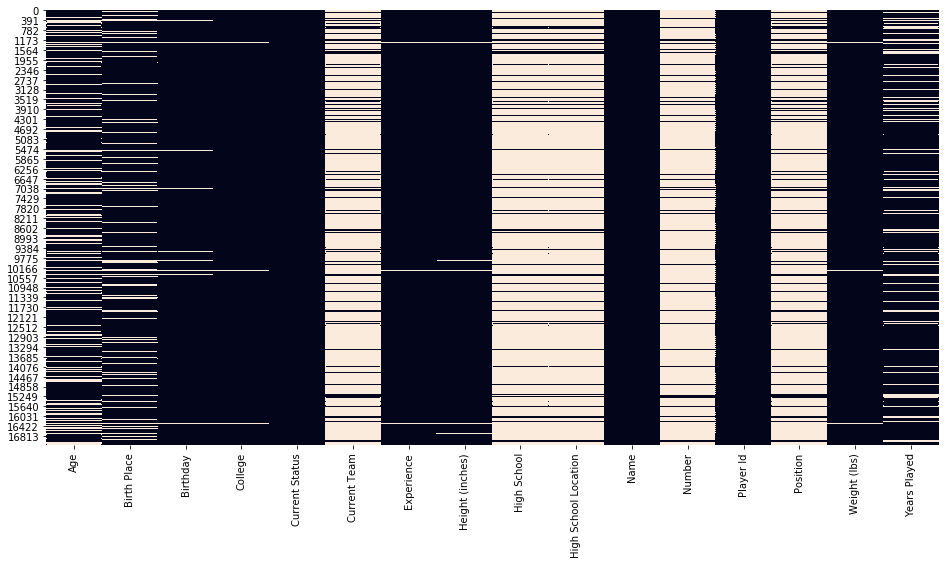

In [19]:
# visualize nulls
dims = (16, 8)
fig, ax = plt.subplots(figsize=dims)
sns.heatmap(df.isnull(), cbar=False)

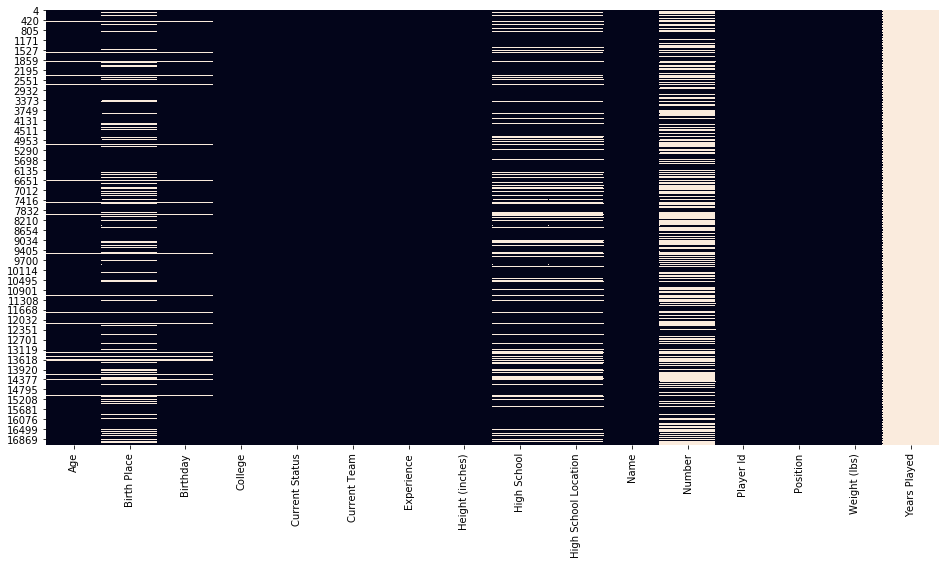

In [20]:
dims = (16, 8)
fig, ax = plt.subplots(figsize=dims)
sns.heatmap(df[df['Current Status']=='Active'].isnull(), cbar=False)